# Data Analysis

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [50]:
tokyo_data = pd.read_csv('../data/TOKYO_DAILY_CLIMATE_BEST_Jan14May24.csv')

tokyo_data['Date'] = pd.to_datetime(tokyo_data['DATE'], format='%Y-%m-%d')
tokyo_data = tokyo_data.set_index('Date')

tokyo_data.head()


,WMO,WBAN,ICAO,SRC_ID,CITY,LAT,LONG,ALT,DATE,TAVG24_DATATYPE,TAVG24
Date,,,,,,,,,,,
2014-01-01,47662.0,NaN,RJTD,JPN_47662,TOKYO,35.692,139.751,36.0,2014-01-01,15,9.6
2014-01-02,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2014-01-02,15,7.3
2014-01-03,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2014-01-03,15,5.9
2014-01-04,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2014-01-04,15,6.5
2014-01-05,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2014-01-05,15,5.4


In [51]:
tokyo_data.tail()

,WMO,WBAN,ICAO,SRC_ID,CITY,LAT,LONG,ALT,DATE,TAVG24_DATATYPE,TAVG24
Date,,,,,,,,,,,
2024-05-27,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2024-05-27,15,22.3
2024-05-28,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2024-05-28,15,24.0
2024-05-29,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2024-05-29,15,22.0
2024-05-30,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2024-05-30,15,22.5
2024-05-31,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2024-05-31,15,19.0


In [52]:
tokyo_data.describe()

,WMO,WBAN,LAT,LONG,ALT,TAVG24_DATATYPE,TAVG24
count,1.0,0.0,1.000,1.000,1.0,3804.0,3804.000000
mean,47662.0,NaN,35.692,139.751,36.0,15.0,16.444269
std,NaN,NaN,NaN,NaN,NaN,0.0,7.873254
min,47662.0,NaN,35.692,139.751,36.0,15.0,-0.300000
25%,47662.0,NaN,35.692,139.751,36.0,15.0,9.200000
50%,47662.0,NaN,35.692,139.751,36.0,15.0,16.700000
75%,47662.0,NaN,35.692,139.751,36.0,15.0,22.800000
max,47662.0,NaN,35.692,139.751,36.0,15.0,32.200000


In [53]:
tokyo_data = tokyo_data.drop(columns = ['WMO', 'WBAN', 'SRC_ID', 'ALT', 'LAT', 'LONG', 'TAVG24_DATATYPE', 'DATE'])

Text(0.5, 1.0, 'Daily Average Temperature in Tokyo')

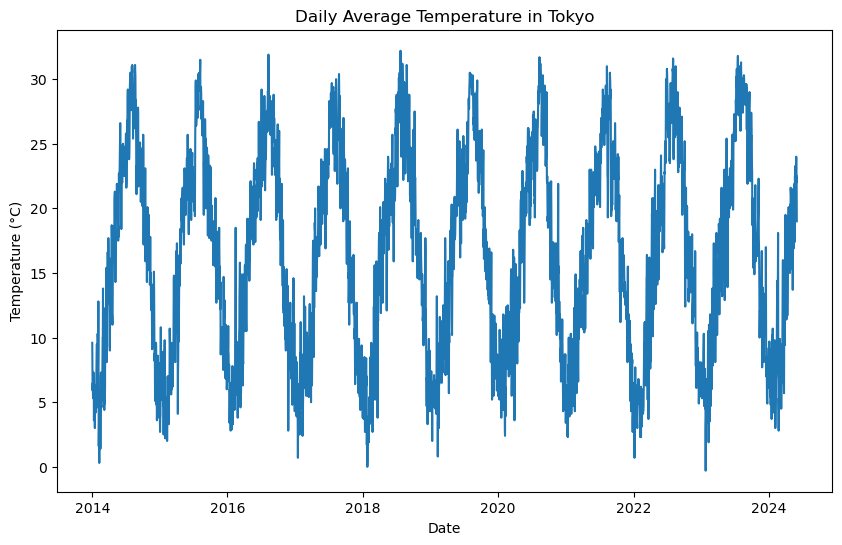

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(tokyo_data.index, tokyo_data['TAVG24'], label='TAVG24 over time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Average Temperature in Tokyo')


In [55]:
# import os
# import glob

# folder_path = '../data/'

# files = glob.glob(os.path.join(folder_path, '*'))

# for file in files:
#     print(f'{file}')

In [56]:
cities = {
    'Amsterdam': '../data/AMSTERDAM SCHIPHOL_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Atlanta': '../data/Atlanta-Hartsfield International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Boston': '../data/Boston-Logan International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Burbank': '../data/Burbank-Glendale-Pasadena Airport _DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Chicago': '../data/Chicago OHare International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Cincinnati': '../data/Cincinnati-Northern Kentucky International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Dallas': '../data/Dallas-Fort Worth International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Essen': '../data/ESSEN_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Houston': '../data/Houston-George Bush Intercontinental Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Las Vegas': '../data/Las Vegas Mccarran Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'London': '../data/LONDON HEATHROW_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Minneapolis': '../data/Minneapolis-Saint Paul International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'New York': '../data/New York LaGuardia Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Paris': '../data/PARIS ORLY_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Philadelphia': '../data/Philadelphia International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Portland': '../data/Portland International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Sacramento': '../data/Sacramento Executive Airport_DAILY_CLIMATE_BEST_Jan14May24.csv'
}

t_max = pd.DataFrame()
t_min = pd.DataFrame()
t_avg = pd.DataFrame()

for city, file in cities.items():
    data = pd.read_csv(file)
    data['Date'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')
    data = data.set_index('Date')
    
    # Convert Fahrenheit to Celsius
    if city in ['Atlanta', 'Boston', 'Chicago', 'Cincinnati', 'Dallas', 'Houston', 'Las Vegas', 'Minneapolis', 'New York', 'Philadelphia', 'Portland', 'Sacramento']:
        t_max[city] = ((data[['DAILY_MAX_TEMP']] - 32)*5.0)/9.0
        t_min[city] = ((data[['DAILY_MIN_TEMP']] - 32)*5.0)/9.0
    else:
        t_max[city] = data[['DAILY_MAX_TEMP']]
        t_min[city] = data[['DAILY_MIN_TEMP']]
    t_avg[city] = (t_max[city] + t_min[city])/2
    

t_avg['Tokyo'] = tokyo_data[['TAVG24']]
t_avg.head()

,Amsterdam,Atlanta,Boston,Burbank,Chicago,Cincinnati,Dallas,Essen,Houston,Las Vegas,London,Minneapolis,New York,Paris,Philadelphia,Portland,Sacramento,Tokyo
Date,,,,,,,,,,,,,,,,,,
2014-01-01,6.55,5.000000,-4.444444,60.5,-8.888889,1.666667,10.000000,6.45,13.055556,11.666667,8.5,-19.722222,-1.666667,8.45,0.000000,3.888889,8.055556,9.6
2014-01-02,7.75,3.888889,-10.000000,67.0,-12.222222,-3.888889,1.111111,7.85,8.888889,11.666667,8.6,-19.444444,-3.888889,9.75,-1.944444,4.722222,10.277778,7.3
2014-01-03,8.50,-1.944444,-13.333333,62.5,-15.555556,-11.944444,3.611111,8.60,5.833333,10.555556,8.6,-12.500000,-9.722222,11.10,-8.611111,3.888889,10.000000,5.9
2014-01-04,7.45,-1.111111,-9.722222,60.0,-3.888889,-3.888889,13.055556,8.00,10.277778,10.833333,7.4,-8.611111,-7.500000,9.95,-7.500000,1.111111,10.555556,6.5
2014-01-05,5.15,6.111111,-0.555556,62.0,-10.555556,2.222222,1.944444,6.40,10.000000,7.777778,6.6,-23.888889,3.055556,7.50,1.944444,2.777778,9.166667,5.4


Text(0, 0.5, 'Temperature (°C)')

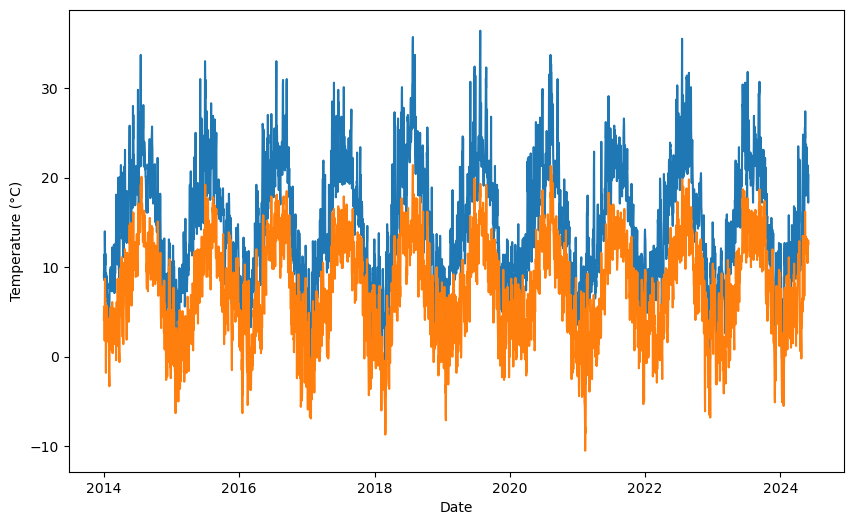

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(t_max.index, t_max['Amsterdam'], label='Amsterdam')
plt.plot(t_min.index, t_min['Amsterdam'], label='Amsterdam')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

Text(0, 0.5, 'Temperature (°C)')

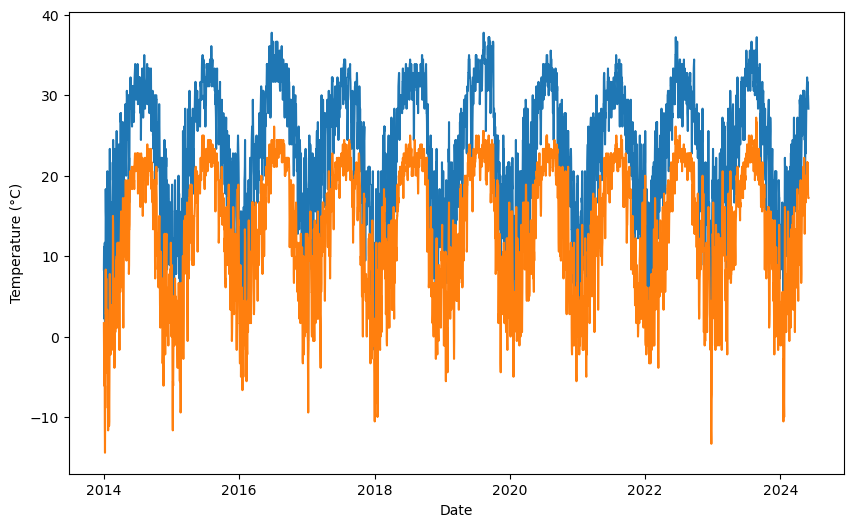

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(t_max.index, t_max['Atlanta'], label='Atlanta')
plt.plot(t_min.index, t_min['Atlanta'], label='Atlanta')

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

In [59]:
correlation = t_avg.corr()
correlation

,Amsterdam,Atlanta,Boston,Burbank,Chicago,Cincinnati,Dallas,Essen,Houston,Las Vegas,London,Minneapolis,New York,Paris,Philadelphia,Portland,Sacramento,Tokyo
Amsterdam,1.000000,0.744674,0.789553,0.664613,0.778784,0.754198,0.752024,0.973108,0.722036,0.793299,0.941890,0.783552,0.794950,0.938696,0.791008,0.774556,0.772974,0.812110
Atlanta,0.744674,1.000000,0.862837,0.604199,0.878280,0.933894,0.858713,0.739625,0.893912,0.777908,0.754837,0.837025,0.893848,0.752719,0.911518,0.749937,0.745874,0.815253
Boston,0.789553,0.862837,1.000000,0.677924,0.870341,0.878949,0.815862,0.772147,0.806387,0.809896,0.796760,0.838464,0.979350,0.785786,0.962412,0.794454,0.781060,0.851493
Burbank,0.664613,0.604199,0.677924,1.000000,0.646286,0.611308,0.646922,0.647441,0.593785,0.843624,0.676287,0.675937,0.679862,0.669607,0.674431,0.794184,0.864757,0.735854
Chicago,0.778784,0.878280,0.870341,0.646286,1.000000,0.950497,0.902561,0.767766,0.870268,0.812051,0.783357,0.953103,0.897503,0.781581,0.894876,0.792848,0.773862,0.847449
Cincinnati,0.754198,0.933894,0.878949,0.611308,0.950497,1.000000,0.893944,0.746229,0.892466,0.781912,0.763178,0.894225,0.911513,0.758898,0.922311,0.762471,0.747410,0.822832
Dallas,0.752024,0.858713,0.815862,0.646922,0.902561,0.893944,1.000000,0.743550,0.942468,0.821201,0.764085,0.887076,0.837343,0.764477,0.838398,0.779693,0.768840,0.826958
Essen,0.973108,0.739625,0.772147,0.647441,0.767766,0.746229,0.743550,1.000000,0.717281,0.783077,0.930999,0.772781,0.777759,0.950863,0.775583,0.765573,0.760923,0.798063
Houston,0.722036,0.893912,0.806387,0.593785,0.870268,0.892466,0.942468,0.717281,1.000000,0.777992,0.736173,0.836057,0.831385,0.740945,0.836127,0.737263,0.735116,0.799448
Las Vegas,0.793299,0.777908,0.809896,0.843624,0.812051,0.781912,0.821201,0.783077,0.777992,1.000000,0.802774,0.844228,0.815984,0.805554,0.817614,0.878821,0.923826,0.861592


## Test Normality of difference of Temperature
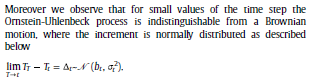



In [60]:
t_change = t_avg.diff().round(1)
t_change.dropna(inplace=True)
t_change.head()

,Amsterdam,Atlanta,Boston,Burbank,Chicago,Cincinnati,Dallas,Essen,Houston,Las Vegas,London,Minneapolis,New York,Paris,Philadelphia,Portland,Sacramento,Tokyo
Date,,,,,,,,,,,,,,,,,,
2014-01-02,1.2,-1.1,-5.6,6.5,-3.3,-5.6,-8.9,1.4,-4.2,0.0,0.1,0.3,-2.2,1.3,-1.9,0.8,2.2,-2.3
2014-01-03,0.8,-5.8,-3.3,-4.5,-3.3,-8.1,2.5,0.8,-3.1,-1.1,0.0,6.9,-5.8,1.3,-6.7,-0.8,-0.3,-1.4
2014-01-04,-1.0,0.8,3.6,-2.5,11.7,8.1,9.4,-0.6,4.4,0.3,-1.2,3.9,2.2,-1.2,1.1,-2.8,0.6,0.6
2014-01-05,-2.3,7.2,9.2,2.0,-6.7,6.1,-11.1,-1.6,-0.3,-3.1,-0.8,-15.3,10.6,-2.4,9.4,1.7,-1.4,-1.1
2014-01-06,5.1,-5.8,6.4,0.5,-12.2,-15.3,-6.4,2.0,-10.3,0.0,1.1,-3.6,-0.6,3.1,0.6,0.0,-0.6,-0.1


In [61]:
t_change.describe()

,Amsterdam,Atlanta,Boston,Burbank,Chicago,Cincinnati,Dallas,Essen,Houston,Las Vegas,London,Minneapolis,New York,Paris,Philadelphia,Portland,Sacramento,Tokyo
count,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000
mean,0.003366,0.005075,0.005364,0.001315,0.007205,0.004865,0.003576,0.001315,0.002787,0.005890,0.001709,0.009887,0.005943,0.001157,0.004628,0.003708,0.003813,0.002472
std,2.077736,2.729490,3.580137,3.349334,3.622858,3.573615,3.304290,2.254760,2.981381,2.117727,1.991127,3.584521,3.271727,2.208047,3.295490,2.142824,1.904336,2.121911
min,-8.500000,-11.700000,-13.100000,-17.000000,-14.700000,-15.300000,-14.700000,-10.100000,-14.400000,-10.800000,-10.200000,-15.300000,-13.600000,-10.200000,-15.600000,-9.700000,-8.600000,-11.900000
25%,-1.200000,-1.100000,-2.200000,-2.000000,-1.900000,-1.900000,-1.400000,-1.400000,-1.100000,-1.100000,-1.200000,-1.900000,-1.900000,-1.400000,-1.900000,-1.400000,-1.100000,-1.200000
50%,-0.100000,0.300000,0.000000,0.000000,0.300000,0.300000,0.300000,0.000000,0.300000,0.300000,0.100000,0.300000,0.300000,0.000000,0.300000,0.000000,0.000000,0.200000
75%,1.300000,1.700000,2.200000,2.000000,2.200000,1.900000,1.900000,1.400000,1.400000,1.400000,1.400000,2.200000,2.200000,1.400000,1.900000,1.400000,1.100000,1.400000
max,8.600000,10.800000,16.900000,15.500000,12.500000,13.300000,13.100000,10.000000,13.600000,6.700000,6.200000,13.900000,11.900000,9.100000,11.900000,8.300000,6.400000,8.000000


count    141.000000
mean      26.971631
std       28.629142
min        1.000000
25%        3.000000
50%       15.000000
75%       46.000000
max      121.000000
Name: count, dtype: float64
count     74.000000
mean      51.391892
std       64.124839
min        1.000000
25%        7.250000
50%       23.000000
75%       68.750000
max      235.000000
Name: count, dtype: float64
count     87.000000
mean      43.712644
std       44.316753
min        1.000000
25%        5.500000
50%       25.000000
75%       74.500000
max      153.000000
Name: count, dtype: float64
count     54.000000
mean      70.425926
std       85.763079
min        1.000000
25%        5.000000
50%       28.000000
75%      129.250000
max      274.000000
Name: count, dtype: float64
count     93.000000
mean      40.892473
std       45.876598
min        1.000000
25%        5.000000
50%       20.000000
75%       60.000000
max      157.000000
Name: count, dtype: float64
count     96.000000
mean      39.614583
std       47.905910


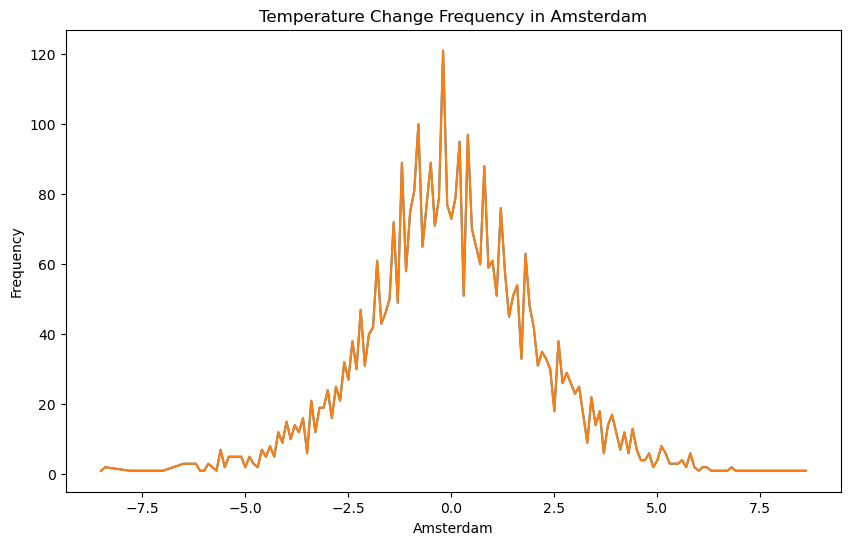

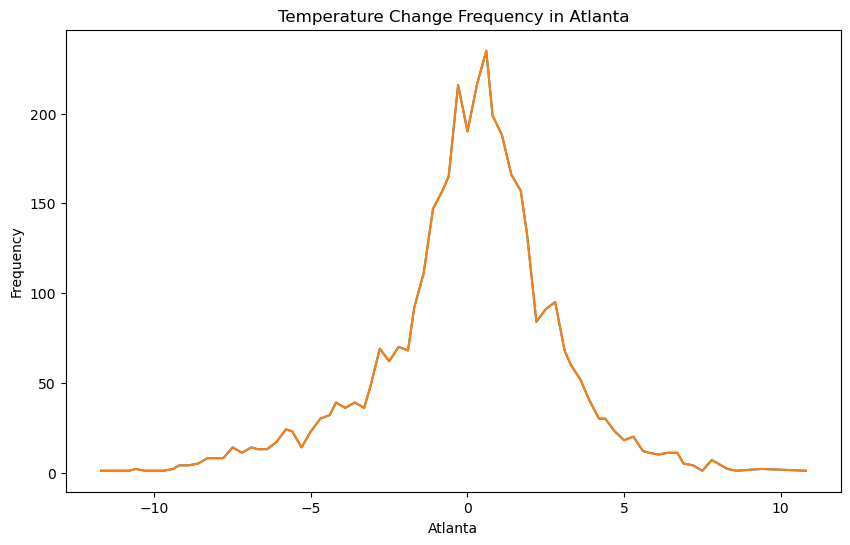

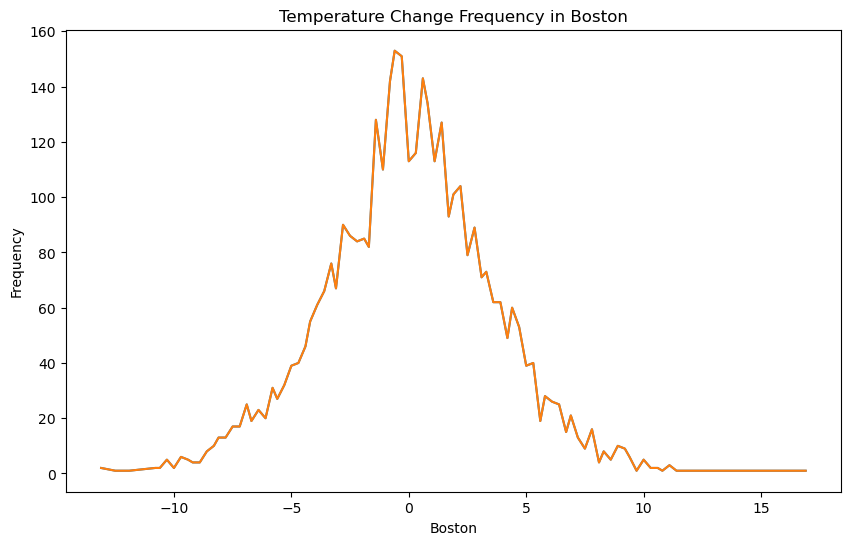

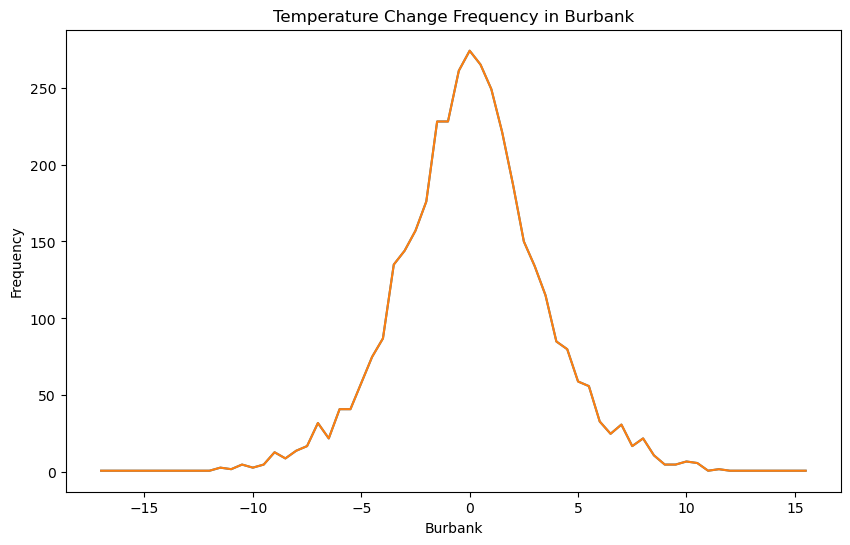

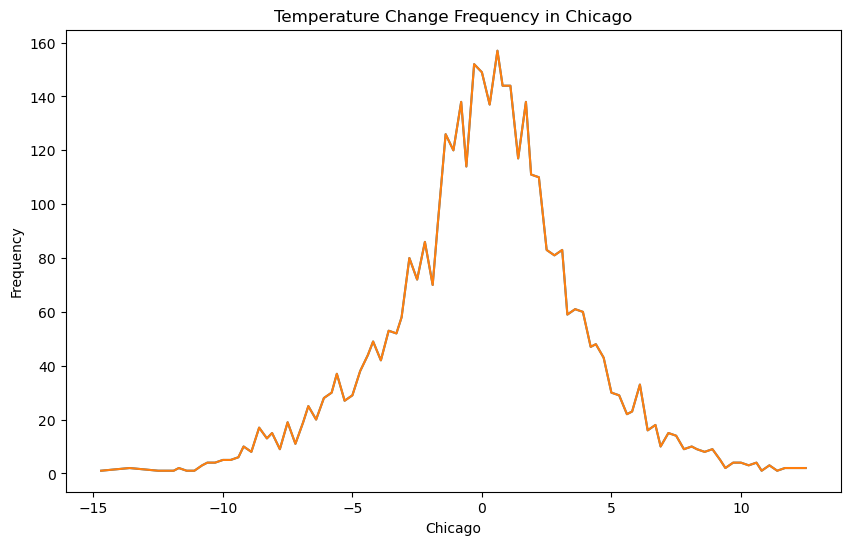

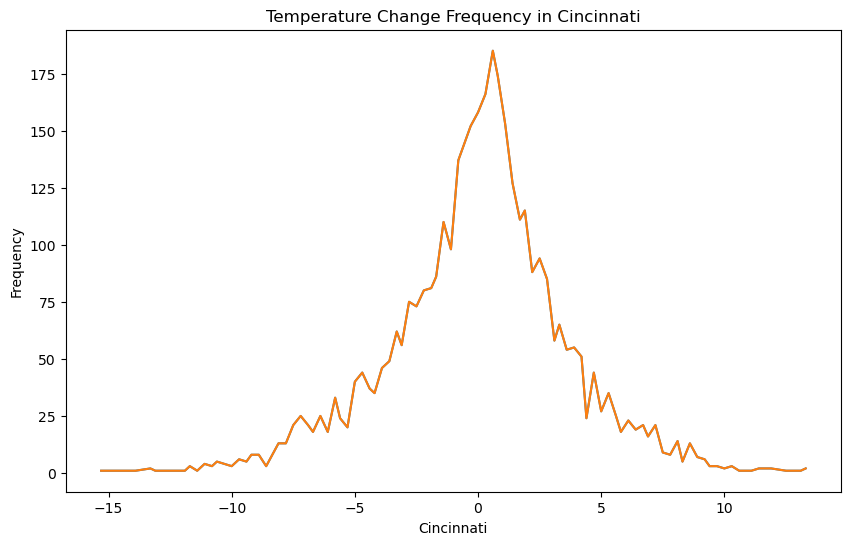

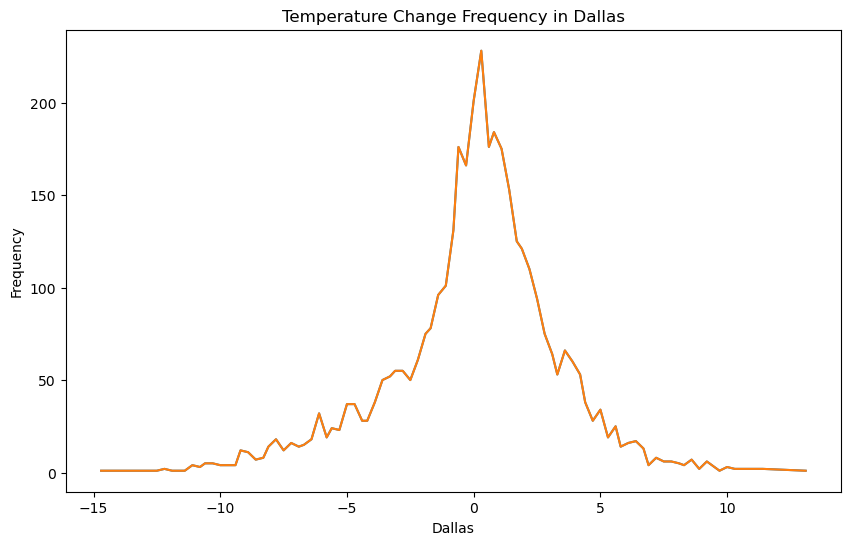

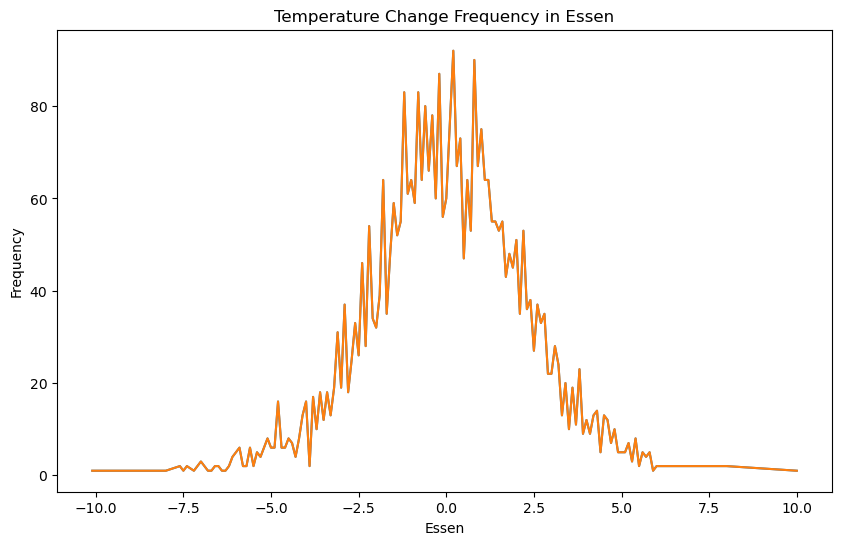

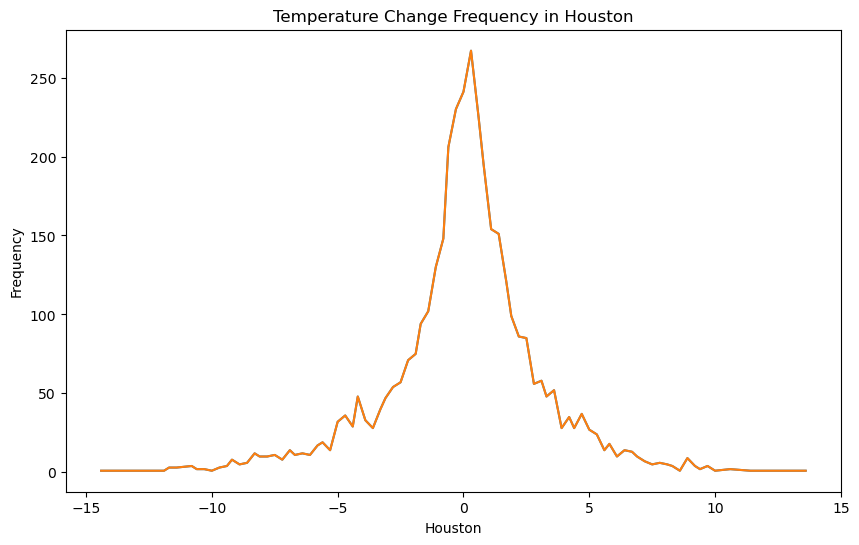

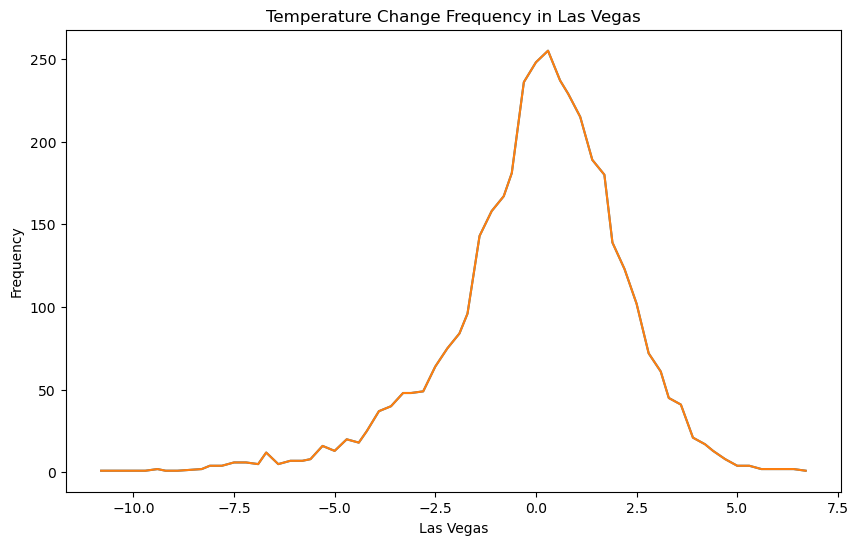

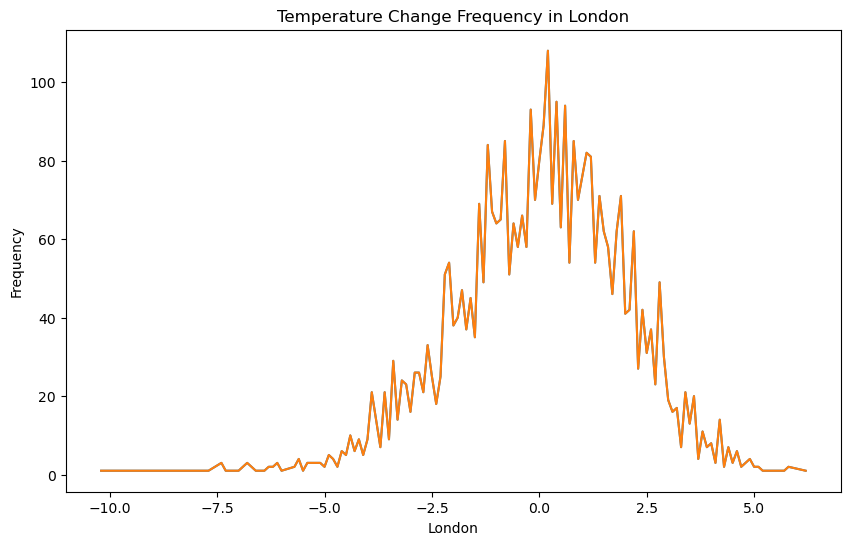

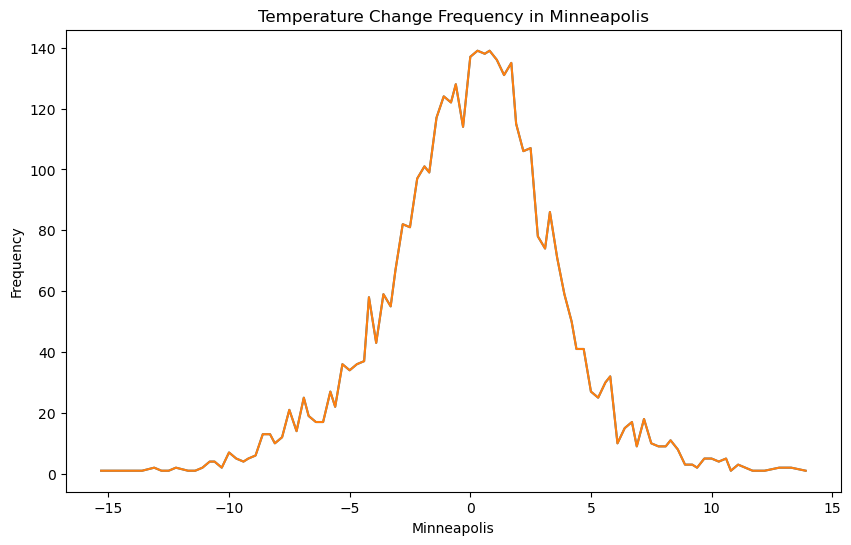

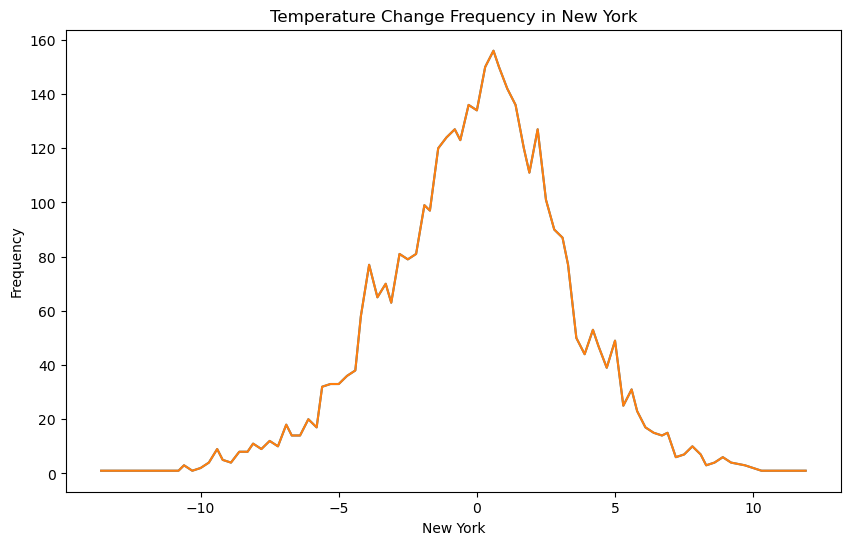

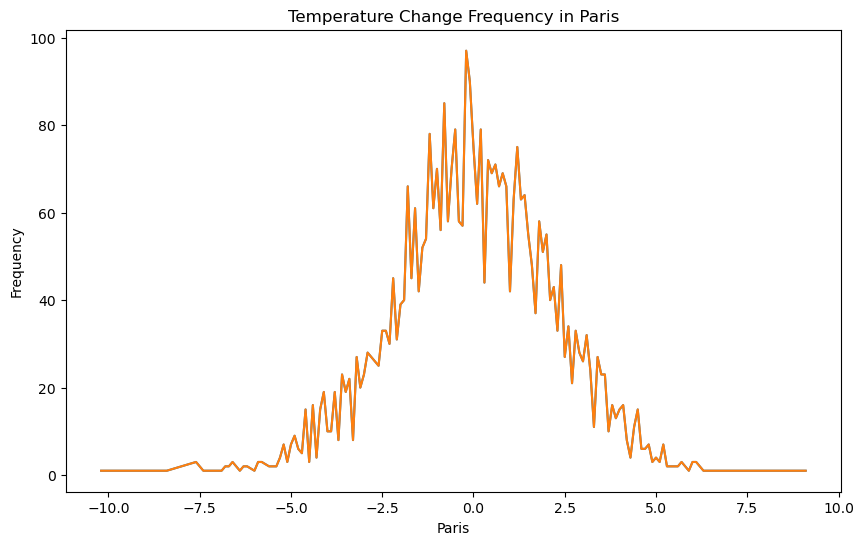

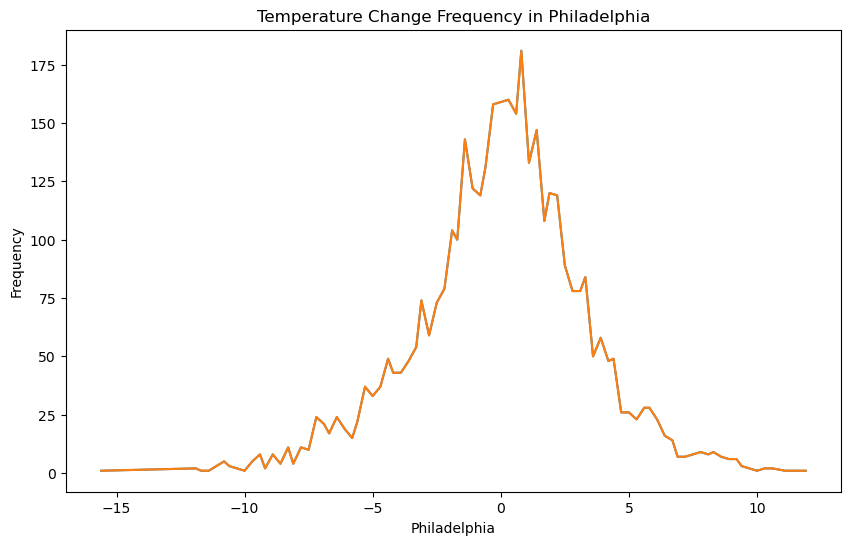

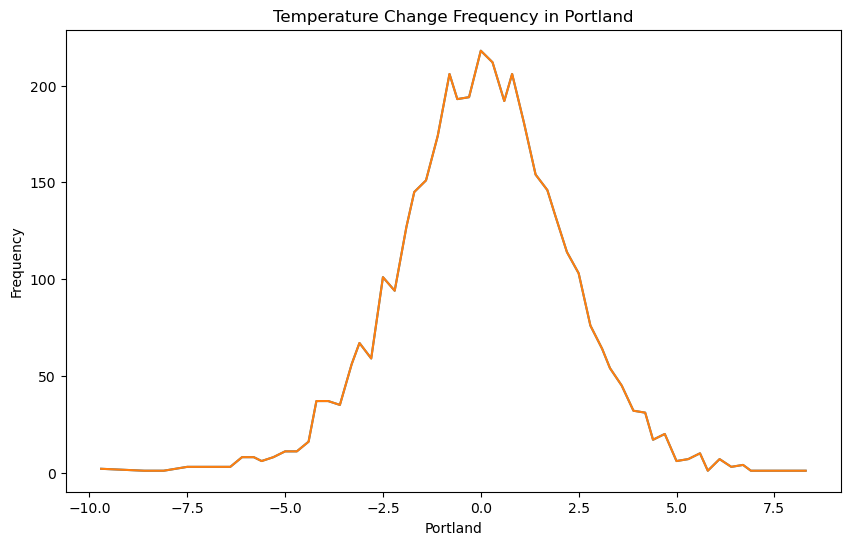

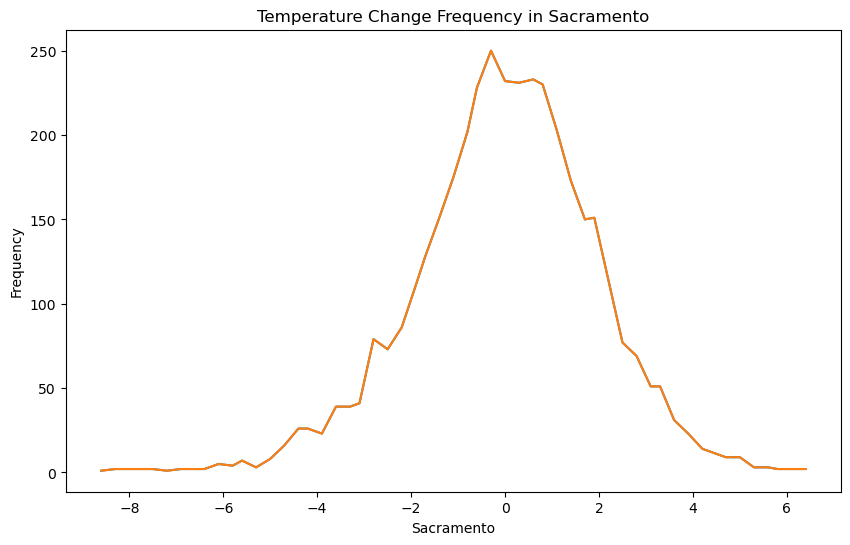

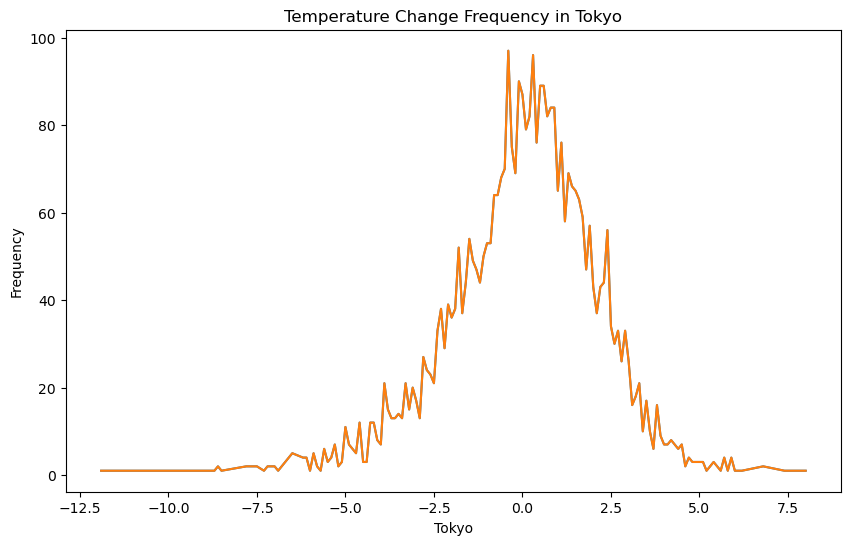

In [62]:
for city in t_change.columns:
    t_change_counts = pd.Series(t_change[city]).value_counts().sort_index()
    print(t_change_counts.describe())
    plt.figure(figsize=(10, 6))
    plt.plot(t_change_counts.index, t_change_counts.values)
    plt.xlabel('Temperature Change (°C)')
    plt.ylabel('Frequency')
    t_change_counts.plot()
    plt.title(f'Temperature Change Frequency in {city}')

In [63]:
for city in t_change.columns:
    t_statistic, p_value = stats.ttest_1samp(t_change[city], 0)
    print(f'{city}: t-statistic = {t_statistic}, p-value = {p_value}')
    kurtosis_value = stats.kurtosis(t_change[city])
    skewness_value = stats.skew(t_change[city])
    print(f'{city}: Kurtosis = {kurtosis_value}, Skewness = {skewness_value}')
    print('')

Amsterdam: t-statistic = 0.09989794117215695, p-value = 0.9204306177899662
Amsterdam: Kurtosis = 0.7242987410268484, Skewness = 0.05603521698565257

Atlanta: t-statistic = 0.11466020071995044, p-value = 0.9087205156081225
Atlanta: Kurtosis = 1.3097002302583176, Skewness = -0.5250393770568057

Boston: t-statistic = 0.09239902980787136, p-value = 0.9263858783299552
Boston: Kurtosis = 0.4028254510691096, Skewness = -0.012782413824862993

Burbank: t-statistic = 0.024207409800248054, p-value = 0.9806884380643941
Burbank: Kurtosis = 0.9375815478573362, Skewness = -0.012274602399239866

Chicago: t-statistic = 0.12264109959294311, p-value = 0.9023977892914907
Chicago: Kurtosis = 0.7428985946771012, Skewness = -0.15960412541793587

Cincinnati: t-statistic = 0.08394616540789313, p-value = 0.9331036538908932
Cincinnati: Kurtosis = 1.0279478718389825, Skewness = -0.19243179488073647

Dallas: t-statistic = 0.06674174066477757, p-value = 0.9467908133776766
Dallas: Kurtosis = 1.4168538242702846, Skew

In [64]:
change_correlation = t_change.corr()
change_correlation

,Amsterdam,Atlanta,Boston,Burbank,Chicago,Cincinnati,Dallas,Essen,Houston,Las Vegas,London,Minneapolis,New York,Paris,Philadelphia,Portland,Sacramento,Tokyo
Amsterdam,1.000000,0.017231,0.005579,-0.003079,0.009041,0.001426,0.017483,0.738339,0.004820,0.020807,0.501905,0.034945,-0.002078,0.492839,-0.000891,-0.006590,0.021059,0.022990
Atlanta,0.017231,1.000000,0.253110,-0.025699,0.155407,0.452921,0.102045,0.012178,0.347571,-0.136269,0.000160,-0.070345,0.351598,-0.012161,0.402147,0.023232,-0.050371,-0.007835
Boston,0.005579,0.253110,1.000000,0.003489,-0.050493,0.168555,-0.019370,-0.008556,0.080686,-0.044541,-0.005766,-0.233767,0.812599,-0.017188,0.701600,0.019387,-0.005492,-0.004049
Burbank,-0.003079,-0.025699,0.003489,1.000000,-0.102926,-0.067553,-0.116312,-0.027666,-0.073816,0.258340,0.016168,-0.080127,-0.007674,-0.006957,0.008900,0.153121,0.274791,-0.015259
Chicago,0.009041,0.155407,-0.050493,-0.102926,1.000000,0.581115,0.409182,0.030931,0.326190,-0.042560,-0.017183,0.488212,0.005958,0.017712,-0.032484,-0.003409,-0.044567,0.026175
Cincinnati,0.001426,0.452921,0.168555,-0.067553,0.581115,1.000000,0.372138,0.015057,0.454967,-0.116450,-0.004708,0.141248,0.285196,0.010660,0.296086,0.018572,-0.049949,0.010118
Dallas,0.017483,0.102045,-0.019370,-0.116312,0.409182,0.372138,1.000000,0.025085,0.599077,0.005222,0.023041,0.270912,0.007648,0.040638,-0.033006,-0.059764,-0.068409,0.021608
Essen,0.738339,0.012178,-0.008556,-0.027666,0.030931,0.015057,0.025085,1.000000,0.005470,-0.002398,0.452131,0.020895,-0.021061,0.555628,-0.023713,0.004257,-0.005614,0.021755
Houston,0.004820,0.347571,0.080686,-0.073816,0.326190,0.454967,0.599077,0.005470,1.000000,-0.068092,0.016137,0.080481,0.140314,0.023096,0.113598,-0.045671,-0.075767,0.004078
Las Vegas,0.020807,-0.136269,-0.044541,0.258340,-0.042560,-0.116450,0.005222,-0.002398,-0.068092,1.000000,0.029293,0.021799,-0.070653,0.010109,-0.070043,0.022731,0.195933,-0.001577
